# Inventor Disambiguation Summaries

This document shows the use of the `InventorDisambiguationSummary` class to obtain descriptive statistics and visualizations of the output of an inventor disambiguation algorithm.

The key assumption is that the disambiguation algorithm has resulted in a table with one row for each inventor mention and with the following columns:
- **patent_id**: the inventor mention's patent_id
- **inventor_id**: the inventor unique id assigned by the disambiguation algorithm
- **name_first**: the inventor mention's first name
- **name_last**: the inventor mention's last name

This table will be used to instanciate `InventorDisambiguationSummary` objects and generate summaries.

## Dependencies

In order to execute this notebook, you need the development environment described below.

#### Development environment:

- Need conda.
- Development environment can be created and updated using:
```sh
    cd PatentsView-Evaluation
    make env
    conda activate pv-evaluation
```
- Package **pv-evaluation** can be installed using `pip install -e .`

#### Package imports

In [1]:
DATA_PATH = "tests/resources/raw_inventor_sample.tsv"

In [2]:
import plotly.io as pio
pio.templates.default = "plotly_white" # Set plotly theme

from pv_evaluation.summary import InventorDisambiguationSummary

## Examples

#### Setting up InventorDisambigationSummary object

To get started, instanciate a `InventorDisambiguationSummary` object using the disambiguation table output. Note:

- The argument `processed_data_dir` is set to the home directory in order to save and re-use processed data across executions of this notebook.
- The argument `name` is used to identify the disambiguation algorithm considered. This is used for when multiple algorithms are compared to each other.

In [3]:
summarizer = InventorDisambiguationSummary(DATA_PATH, name="PV-Current")

### Cluster sizes

#### Cluster size distribution data

Get the cluster size distribution as a table:

In [4]:
summarizer.get_cluster_size_distribution()

,Number of patents,Number of inventors
0,1,4725
1,2,1601
2,3,781
3,4,512
4,5,350
...,...,...
110,115,1
111,73,1
112,96,1
113,185,1


#### Cluster size distribution plot

Plot the cluster size distribution. We can see from the plot below that there are 1.75M inventors with a single patent, about 0.6M inventors with two patents, etc.

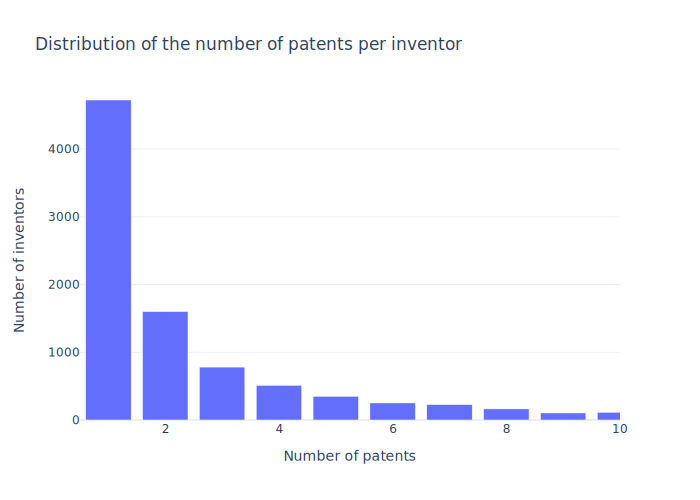

In [5]:
fig = summarizer.plot_cluster_size_distribution(range=(0.5,10))
fig.show("svg")

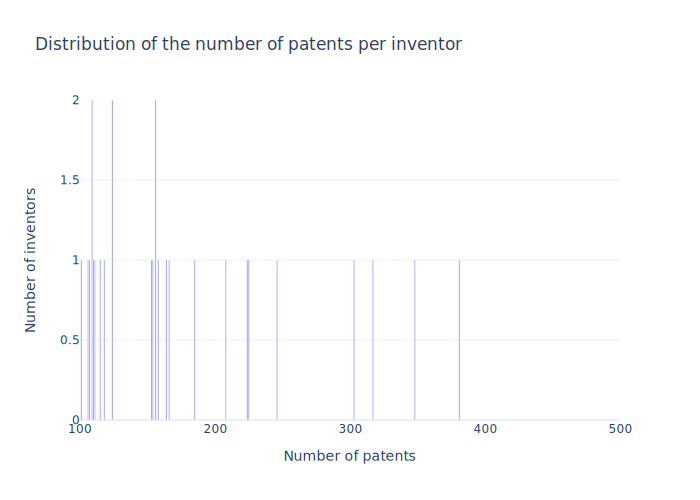

In [6]:
fig = summarizer.plot_cluster_size_distribution(range=(100,500))
fig.show("svg")

#### Show histograms side by side

Use `compare_plots()` from `pv_evaluation.utils` in order to compare plots next to each other:

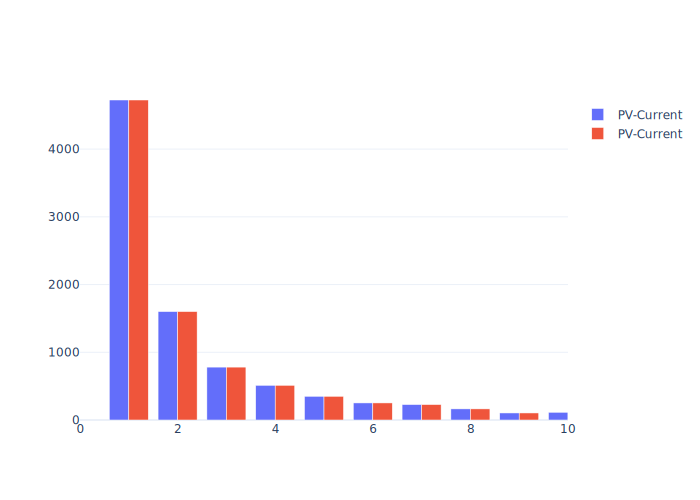

In [7]:
from pv_evaluation.utils import compare_plots

fig1 = summarizer.plot_cluster_size_distribution(range=(0,10))
fig2 = summarizer.plot_cluster_size_distribution(range=(0,10))
fig = compare_plots(fig1, fig2)
fig.show("svg")

#### Top inventors

In [8]:
summarizer.get_top_inventors()

,Number of patents,name_first,name_last
inventor_id,,,
fl:sa_ln:abraham-15,381,Santosh Paul,Abraham
fl:hi_ln:abe-90,348,Hiroshi,Abe
fl:ki_ln:abe-1,317,Kiyofumi,Abe
fl:hi_ln:abe-41,303,Hiroyuki,Abe
fl:ta_ln:abe-70,246,Takashi,Abe
fl:ko_ln:abe-19,225,Koji,Abe
fl:te_ln:abe-20,224,Tetsuya,Abe
fl:ch_ln:abraham-10,208,Charles,Abraham
fl:je_ln:aaron-3,185,Jeffrey,Aaron


#### Entropy curve

Show the [Hill Numbers](https://en.wikipedia.org/wiki/Diversity_index) (exponentiated [Rényi entropy](https://en.wikipedia.org/wiki/R%C3%A9nyi_entropy)) entropy curve for the cluster size distribution:

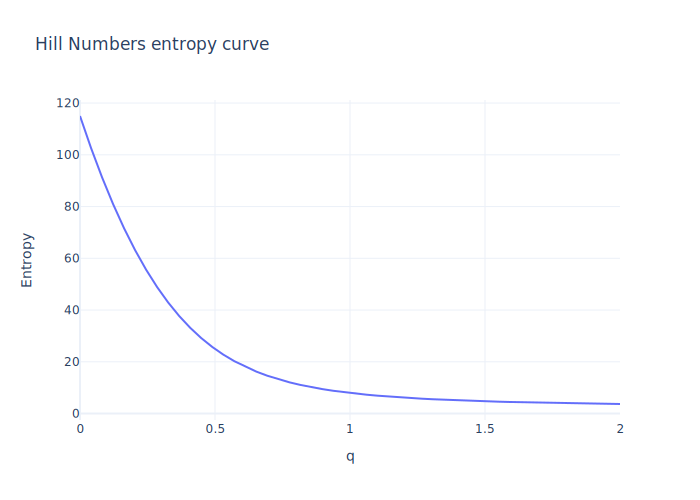

In [9]:
fig = summarizer.plot_entropy_curve()
fig.show("svg")

### Cluster homogeneity

As a measure of cluster homogeneity, we consider the proportion of clusters which have no name variation (no misspellings or other variation in the stated name). This measure is computed for each cluster size.

In [10]:
summarizer.get_cluster_unique_name_distribution()

,Number of patents,Proportion of unique name
0,1,1.000000
1,2,0.870706
2,3,0.801536
3,4,0.746094
4,5,0.705714
...,...,...
110,246,1.000000
111,303,1.000000
112,317,1.000000
113,348,1.000000


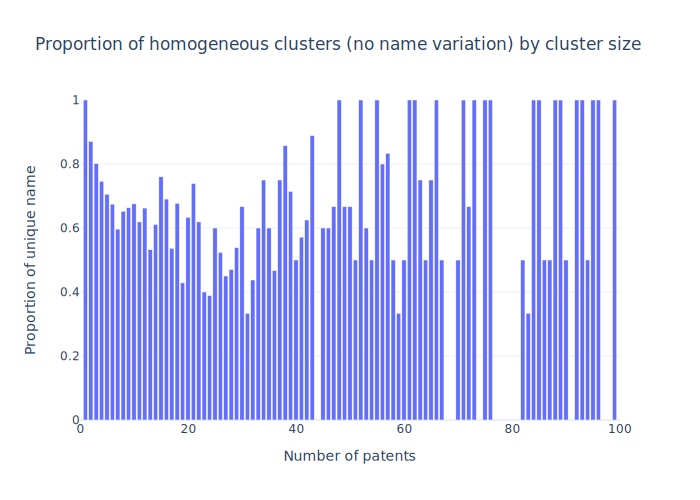

In [11]:
fig = summarizer.plot_cluster_unique_name_distribution(range=(0, 100))
fig.show("svg")

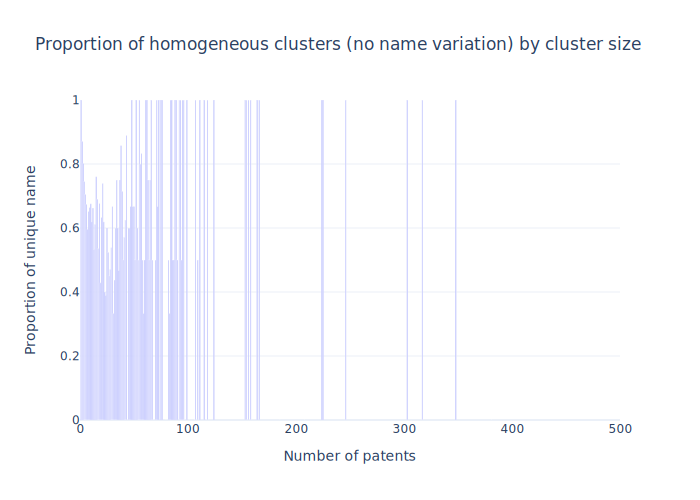

In [12]:
fig = summarizer.plot_cluster_unique_name_distribution(range=(0, 500))
fig.show("svg")

### Between-cluster heterogeneity (homonymy rates)

The homonymy rate is the proportion of clusters which share at least one name mention with another cluster.

Use the function `get_homonymy_rate_distribution()` to obtain homonymy rates for each cluster size:

In [13]:
summarizer.get_homonymy_rate_distribution()

,Number of patents,Homonymy rate
0,1,0.000000
1,2,0.059963
2,3,0.074264
3,4,0.074219
4,5,0.091429
...,...,...
110,246,1.000000
111,303,1.000000
112,317,0.000000
113,348,1.000000


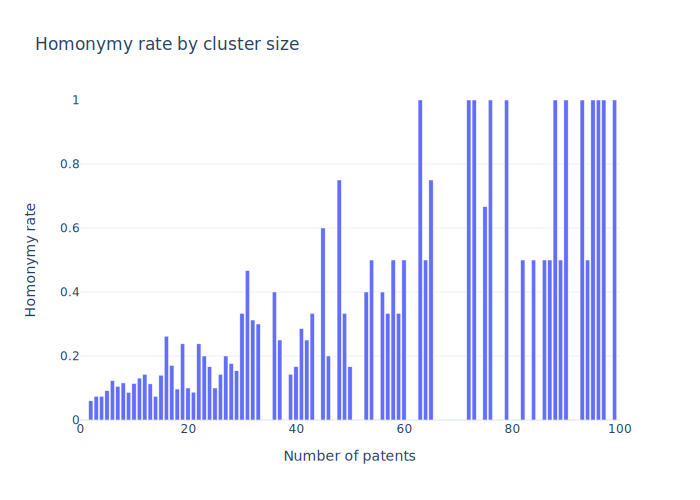

In [14]:
fig = summarizer.plot_homonymy_rate_distribution()
fig.show("svg")

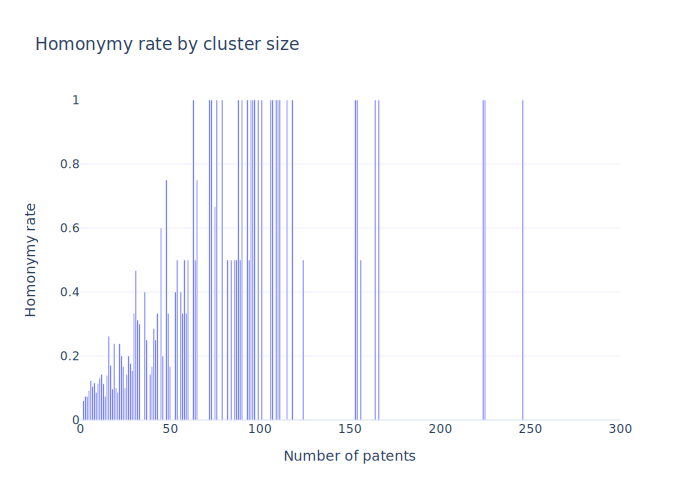

In [15]:
fig = summarizer.plot_homonymy_rate_distribution(range=(0, 300))
fig.show("svg")

#### Homonomy rate for large clusters

In [16]:
summarizer.get_homonymy_rate_distribution().sort_values("Number of patents", ascending=False).head(10)

,Number of patents,Homonymy rate
114,381,1.0
113,348,1.0
112,317,0.0
111,303,1.0
110,246,1.0
109,225,1.0
108,224,1.0
107,208,0.0
106,185,0.0
105,166,1.0
